<a href="https://colab.research.google.com/github/anhvu1214/Xltn/blob/main/DTW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
!pip install dtw
import librosa
import librosa.display
import numpy as np
import IPython.display
import matplotlib.pyplot as plt
from dtw import dtw
from IPython.display import Image
import copy

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


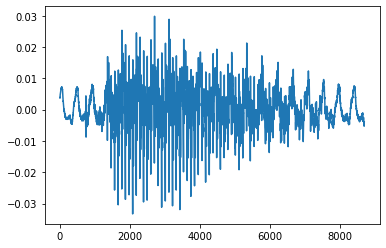

In [17]:
from google.colab import drive
drive.mount('/content/drive')
yTest, srTest = librosa.load('/content/drive/MyDrive/Hoc/Xltn/Audio/A-2.wav')
plt.plot(yTest)
IPython.display.Audio(data=yTest, rate=srTest)

In [5]:
mfcc = librosa.feature.mfcc(yTest, srTest)


In [4]:
y1, sr1 = librosa.load('/content/drive/MyDrive/Hoc/Xltn/Audio/A.wav')
y2, sr2 = librosa.load('/content/drive/MyDrive/Hoc/Xltn/Audio/A-2-2.wav')
y3, sr3 = librosa.load('/content/drive/MyDrive/Hoc/Xltn/Audio/A-3.wav')

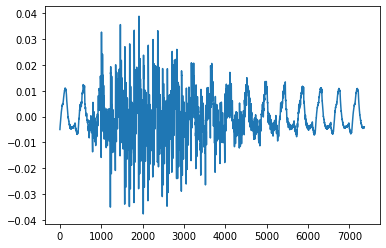

In [6]:
plt.plot(y1)
IPython.display.Audio(data=y1, rate=sr1)

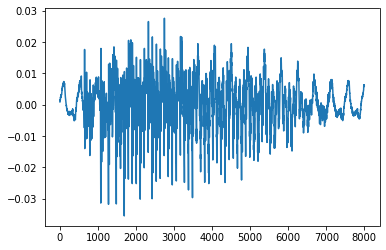

In [7]:
plt.plot(y2)
IPython.display.Audio(data=y2, rate=sr2)

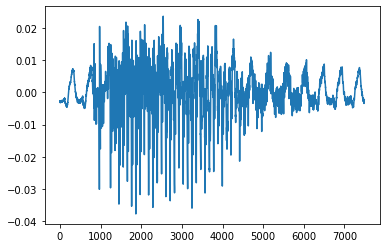

In [8]:
plt.plot(y3)
IPython.display.Audio(data=y3, rate=sr3)

In [19]:
mfcc1 = librosa.feature.mfcc(y1, sr1)
mfcc2 = librosa.feature.mfcc(y2, sr2)
mfcc3 = librosa.feature.mfcc(y3, sr3)
mfccTest = librosa.feature.mfcc(yTest,srTest)


In [20]:
def preprocess_mfcc(mfcc):
    mfcc_cp = copy.deepcopy(mfcc)
    for i in range(mfcc.shape[1]):
        mfcc_cp[:,i] = mfcc[:,i] - np.mean(mfcc[:,i])
        mfcc_cp[:,i] = mfcc_cp[:,i]/np.max(np.abs(mfcc_cp[:,i]))
    return mfcc_cp

In [21]:
mfcc1 = preprocess_mfcc(mfcc1)
mfcc2 = preprocess_mfcc(mfcc2)
mfcc3 = preprocess_mfcc(mfcc3)
mfccTest = preprocess_mfcc(mfccTest)

15 16 15 18
[0. 0. 0.]


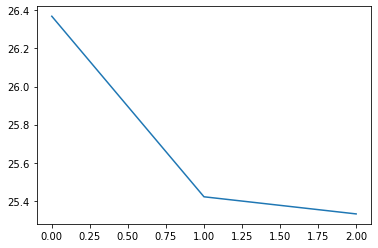

In [22]:
window_size = mfcc1.shape[1]
dists = np.zeros(mfccTest.shape[1] - window_size)
print(mfcc1.shape[1], mfcc2.shape[1], mfcc3.shape[1], mfccTest.shape[1])
print(dists)

for i in range(len(dists)):
    mfcci = mfccTest[:,i:i+window_size]
    dist1i = dtw(mfcc1.T, mfcci.T,dist = lambda x, y: np.exp(np.linalg.norm(x - y, ord=1)))[0]
    dist2i = dtw(mfcc2.T, mfcci.T,dist = lambda x, y: np.exp(np.linalg.norm(x - y, ord=1)))[0]
    dist3i = dtw(mfcc3.T, mfcci.T,dist = lambda x, y: np.exp(np.linalg.norm(x - y, ord=1)))[0]
    dists[i] = (dist1i + dist2i + dist3i)/3
plt.plot(dists)

In [23]:
word_match_idx = dists.argmin()
word_match_idx_bnds = np.array([word_match_idx,np.ceil(word_match_idx+window_size)])
samples_per_mfcc = 512
word_samp_bounds = (2/2) + (word_match_idx_bnds*samples_per_mfcc)
print(word_match_idx_bnds, word_samp_bounds)
print(word_samp_bounds[0], word_samp_bounds[1])

[ 2. 17.] [1025. 8705.]
1025.0 8705.0


In [24]:
word = yTest[int(word_samp_bounds[0]):int(word_samp_bounds[1])]
print(yTest)
print(word)

[ 0.00378418  0.0038147   0.00390625 ... -0.00462341 -0.0042572
 -0.00389099]
[-0.00033569 -0.0005188  -0.00161743 ... -0.00462341 -0.0042572
 -0.00389099]
